In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import pandas as pd
import geopandas as gpd

In [80]:
df = duckdb.sql(
    """
SELECT COUNT(*) AS total_cases, bairro
FROM 'datalake/processed/dengue_manaus_bairros.csv'
GROUP BY bairro
ORDER BY total_cases DESC
"""
).df()
df.head()

,total_cases,bairro
0,711,Tarumã
1,665,São Raimundo
2,411,Centro
3,357,Coroado
4,303,Adrianópolis


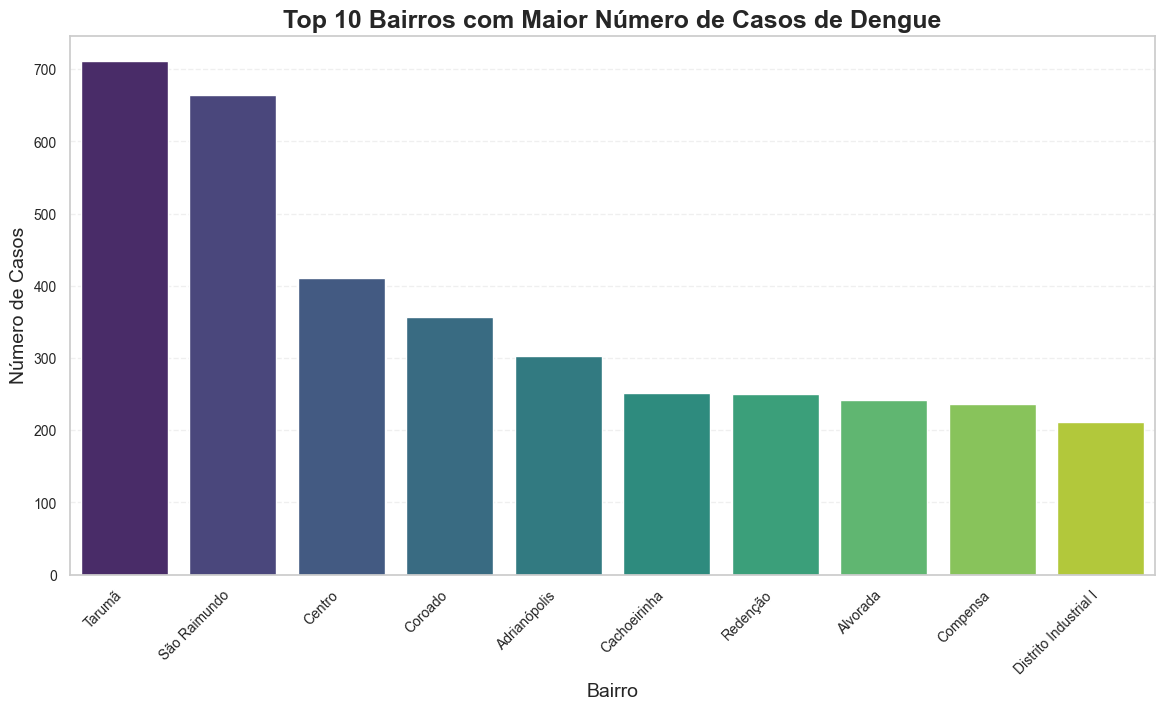

In [81]:
df_top_10 = df.nlargest(10, 'total_cases')

plt.figure(figsize=(14, 7))  # Increased figure size for more bars
sns.barplot(data=df_top_10, x='bairro', y='total_cases',
            palette='viridis', hue='bairro')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Top 10 Bairros com Maior Número de Casos de Dengue',
          fontsize=18, weight='bold')
plt.xlabel('Bairro', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [82]:
df = duckdb.sql(
"""
SELECT 
    bairro,
    COUNT(*) AS total_cases,
    MAX(populacao) AS populacao,
    COUNT(*) * 1.0 / MAX(populacao) AS cases_per_capita
FROM 'datalake/processed/dengue_manaus_bairros.csv'
GROUP BY bairro
ORDER BY cases_per_capita DESC
"""
).df()
df.head()

,bairro,total_cases,populacao,cases_per_capita
0,Distrito Industrial I,211,3201,0.065917
1,São Raimundo,665,18199,0.036540
2,Adrianópolis,303,10459,0.028970
3,Tarumã,711,33168,0.021436
4,Cachoeirinha,252,20035,0.012578


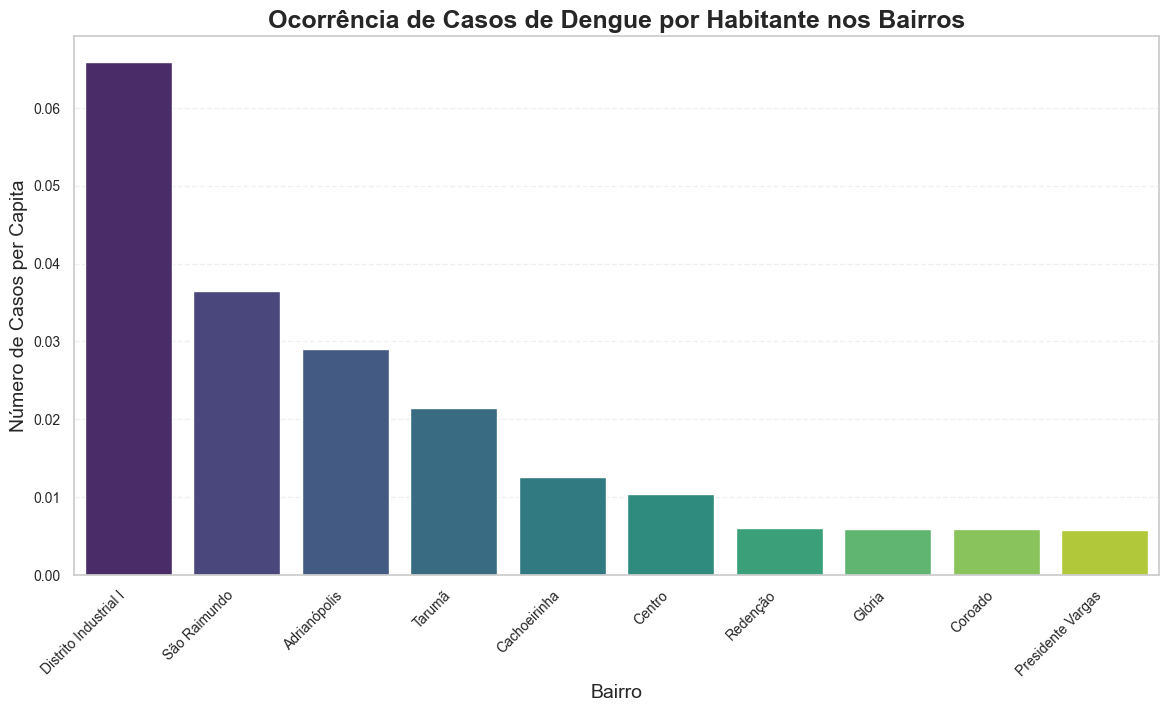

In [83]:
df_top_10 = df.nlargest(10, 'cases_per_capita')

plt.figure(figsize=(14, 7))  # Increased figure size for more bars
sns.barplot(data=df_top_10, x='bairro', y='cases_per_capita',
            palette='viridis', hue='bairro')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Ocorrência de Casos de Dengue por Habitante nos Bairros',	
          fontsize=18, weight='bold')
plt.xlabel('Bairro', fontsize=14)
plt.ylabel('Número de Casos per Capita', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [84]:
df = duckdb.sql("""
SELECT 
    COUNT(*) AS total_cases,
    zona_administrativa
FROM read_csv_auto('datalake/processed/dengue_manaus_bairros.csv')
GROUP BY zona_administrativa
ORDER BY total_cases DESC
""").df()
df.head()

,total_cases,zona_administrativa
0,1715,Oeste
1,1059,Sul
2,520,Centro-Oeste
3,433,Leste
4,396,Centro-Sul


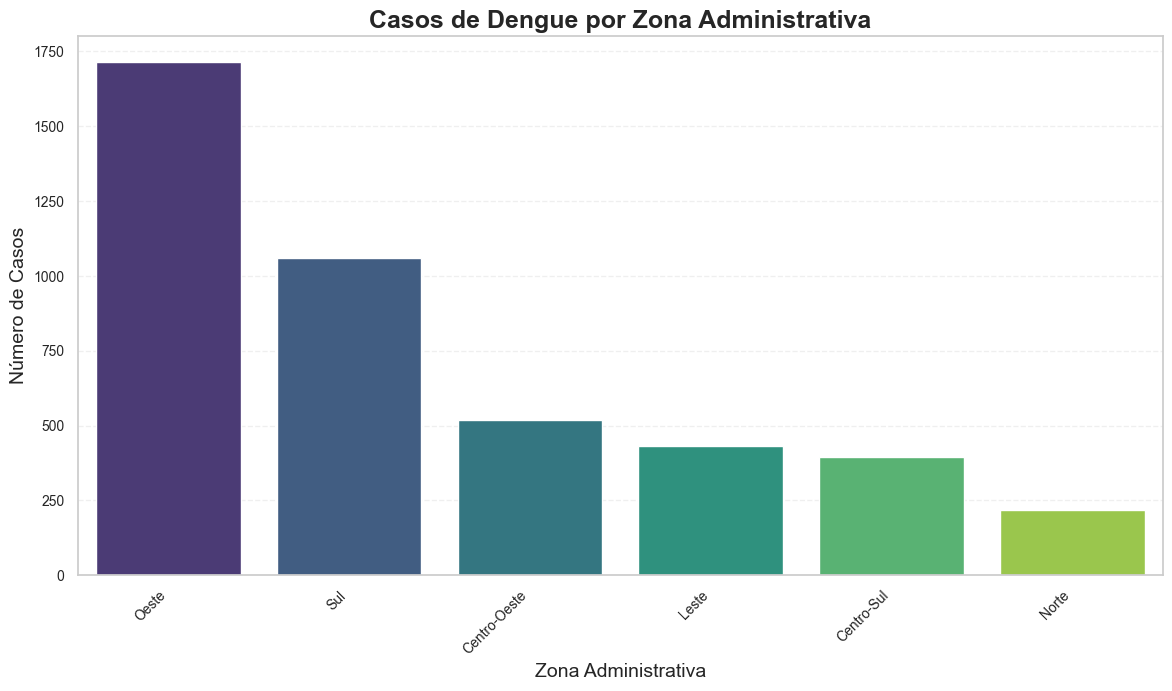

In [85]:
df = df.nlargest(10, 'total_cases')

plt.figure(figsize=(14, 7))  # Increased figure size for more bars
sns.barplot(data=df, x='zona_administrativa', y='total_cases',
            palette='viridis', hue='zona_administrativa')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Casos de Dengue por Zona Administrativa',
          fontsize=18, weight='bold')
plt.xlabel('Zona Administrativa', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
df_bairros = duckdb.sql("""
SELECT
    COUNT(*) as casos, bairro
FROM read_csv_auto('datalake/processed/dengue_manaus_bairros.csv')
GROUP BY bairro
""").df()

,casos,bairro
0,47,Aleixo
1,12,Colônia Terra Nova
2,4,Chapada
3,665,São Raimundo
4,7,Tancredo Neves


In [97]:
full_amazonas = gpd.read_file('datalake/raw/geo/AM_bairros_CD2022.shp')
manaus_bairros = full_amazonas[full_amazonas['NM_MUN'].str.lower() == 'manaus']

geo_merged = manaus_bairros.merge(df_bairros, left_on='NM_BAIRRO', right_on='bairro', how='left')
geo_merged['v0001'] = geo_merged['v0001'].astype(int)
geo_merged['casos'] = geo_merged['casos'].fillna(0)

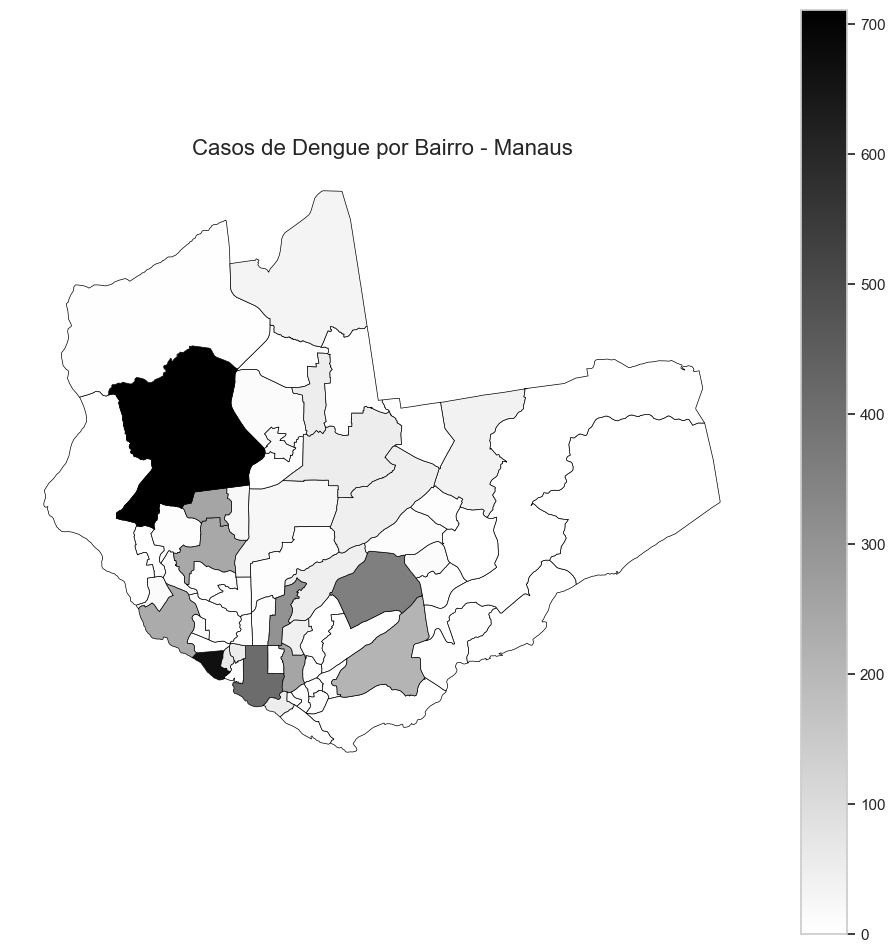

In [98]:
ax = geo_merged.plot(
    column='casos',
    cmap='grey_r',
    legend=True,
    figsize=(12, 12),
    edgecolor='black',
    linewidth=0.5)

ax.set_title('Casos de Dengue por Bairro - Manaus', fontsize=16)
ax.set_axis_off()
plt.show()
plt.show()

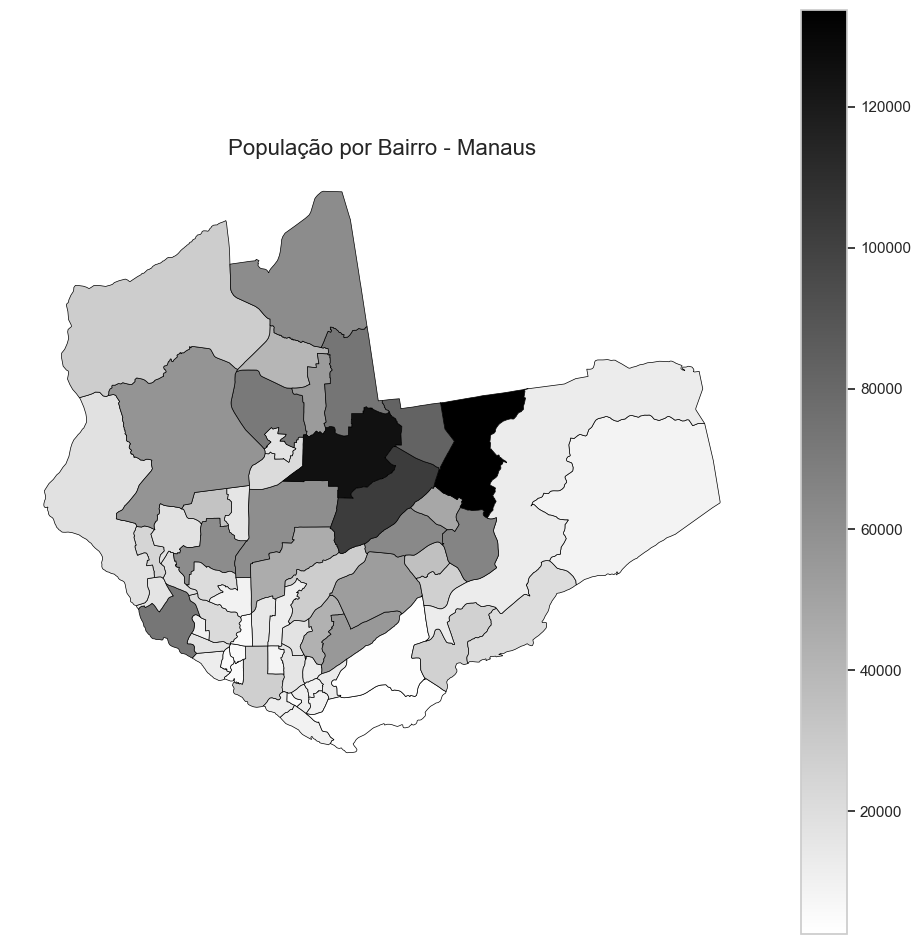

In [99]:
ax = geo_merged.plot(
    column='v0001',
    cmap='grey_r',
    legend=True,
    figsize=(12, 12),
    edgecolor='black',
    linewidth=0.5)

ax.set_title('População por Bairro - Manaus', fontsize=16)
ax.set_axis_off()
plt.show()
plt.show()

In [86]:
df = duckdb.sql("""
    SELECT *
    FROM read_csv_auto('datalake/processed/clima_manaus.csv')
""").df()
df.head()

,mes,TEMPERATURA_AR_BULBO_SECO_C,UMIDADE_RELATIVA_AR_percent,PRECIPITACAO_TOTAL_HORARIO_mm,RADIACAO_GLOBAL_Kj_m2,VENTO_RAJADA_MAXIMA_m_s
0,2023-01,25.890897,83.884138,0.374069,515.180000,3.680000
1,2023-02,25.970399,85.187117,0.542331,539.477914,3.632362
2,2023-03,26.533697,83.757162,0.560982,533.327694,3.777217
3,2023-04,27.054455,81.850071,0.387270,560.903536,3.689235
4,2023-05,27.847139,80.115804,0.183924,511.275034,3.768076


In [87]:
df.columns

Index(['mes', 'TEMPERATURA_AR_BULBO_SECO_C', 'UMIDADE_RELATIVA_AR_percent',
       'PRECIPITACAO_TOTAL_HORARIO_mm', 'RADIACAO_GLOBAL_Kj_m2',
       'VENTO_RAJADA_MAXIMA_m_s'],
      dtype='object')

In [88]:
df_dengue = duckdb.sql("""
SELECT COUNT(*) as cases_per_day, DT_NOTIFIC
FROM read_csv_auto('datalake/processed/dengue_manaus_bairros.csv')
GROUP BY DT_NOTIFIC
""").df()
df_dengue.head()

,cases_per_day,DT_NOTIFIC
0,9,2023-02-07
1,1,2023-02-16
2,1,2023-02-04
3,9,2023-04-26
4,2,2023-05-29


In [89]:
df_dengue['mes'] = pd.to_datetime(df_dengue['DT_NOTIFIC']).dt.to_period('M').dt.to_timestamp()

df_dengue_monthly = df_dengue.groupby('mes')['cases_per_day'].sum().reset_index()

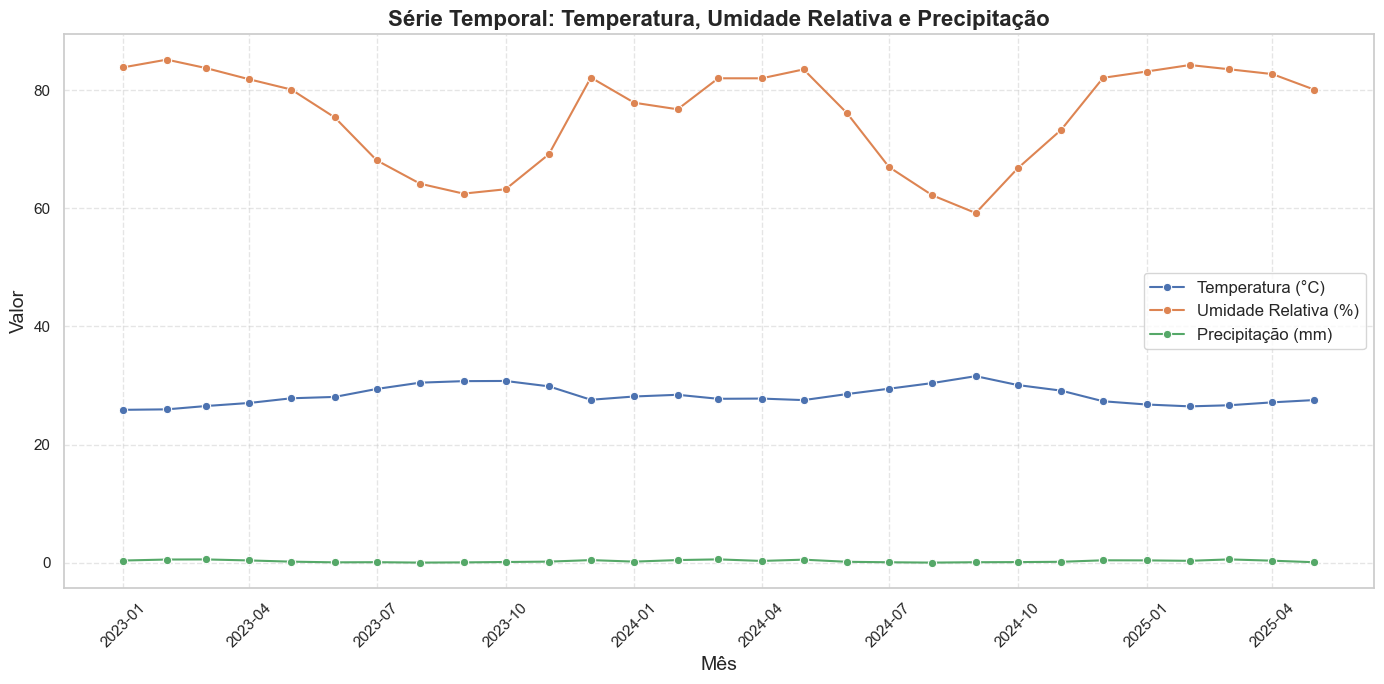

In [90]:
df['mes'] = pd.to_datetime(df['mes'], format='%Y-%m')
df_dengue['DT_NOTIFIC'] = pd.to_datetime(df_dengue['DT_NOTIFIC'], format='%Y-%m')

plt.figure(figsize=(14, 7))

# Plotar temperatura
sns.lineplot(x='mes', y='TEMPERATURA_AR_BULBO_SECO_C', data=df, marker='o', label='Temperatura (°C)')
# Plotar umidade relativa
sns.lineplot(x='mes', y='UMIDADE_RELATIVA_AR_percent', data=df, marker='o', label='Umidade Relativa (%)')
# Plotar precipitação
sns.lineplot(x='mes', y='PRECIPITACAO_TOTAL_HORARIO_mm', data=df, marker='o', label='Precipitação (mm)')

plt.title('Série Temporal: Temperatura, Umidade Relativa e Precipitação', fontsize=16, weight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Valor', fontsize=14)

plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

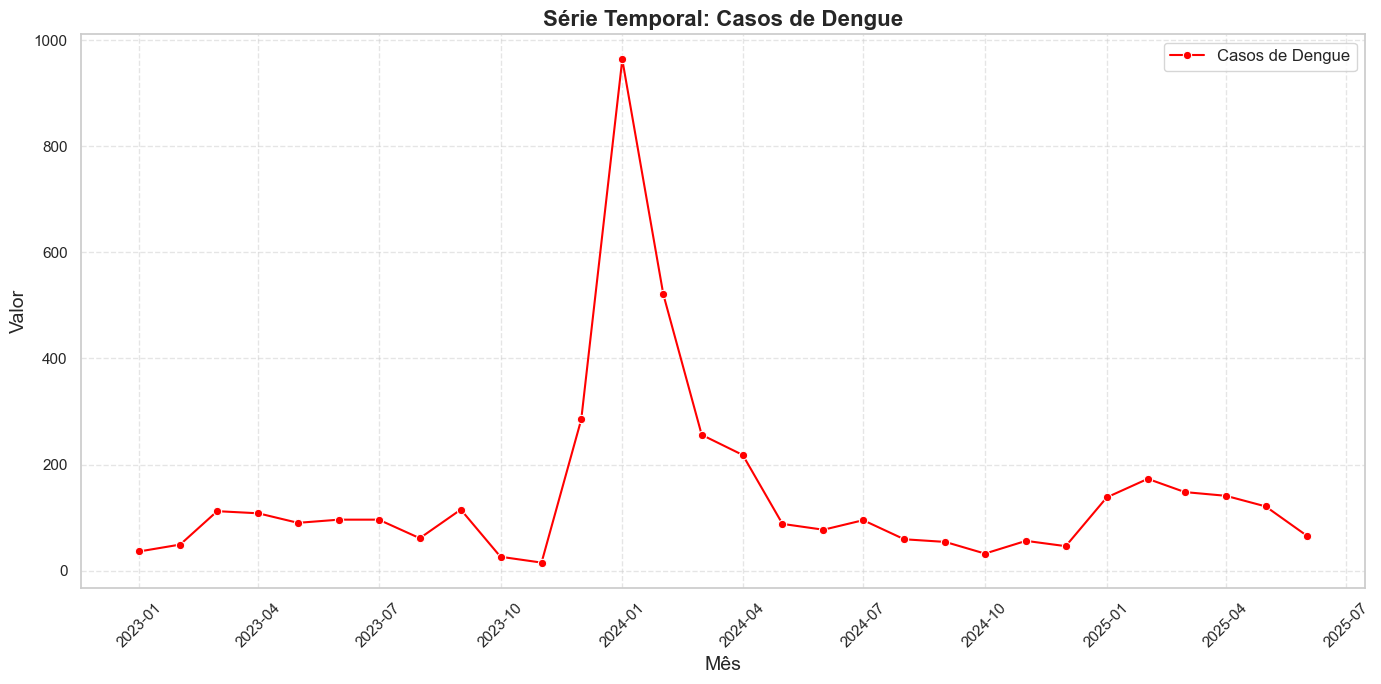

In [91]:
plt.figure(figsize=(14, 7))

sns.lineplot(x='mes', y='cases_per_day', data=df_dengue_monthly, marker='o', label='Casos de Dengue', color='red')

plt.title('Série Temporal: Casos de Dengue', fontsize=16, weight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Valor', fontsize=14)

plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

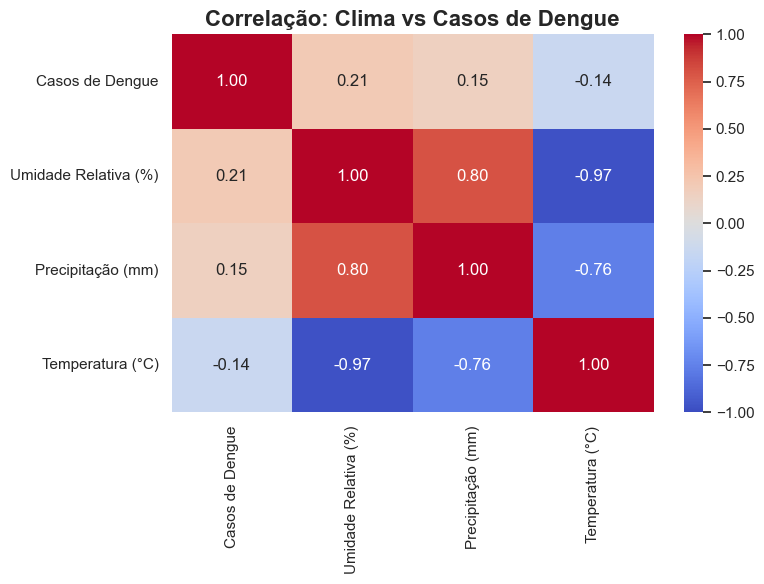

In [92]:
df_merged = pd.merge(df, df_dengue_monthly, on='mes', how='inner')

cols = ['cases_per_day', 'UMIDADE_RELATIVA_AR_percent', 'PRECIPITACAO_TOTAL_HORARIO_mm', 'TEMPERATURA_AR_BULBO_SECO_C']
corr = df_merged[cols].corr()

colunas_legenda = {
    'TEMPERATURA_AR_BULBO_SECO_C': 'Temperatura (°C)',
    'UMIDADE_RELATIVA_AR_percent': 'Umidade Relativa (%)',
    'PRECIPITACAO_TOTAL_HORARIO_mm': 'Precipitação (mm)',
    'cases_per_day': 'Casos de Dengue'
}

corr.rename(columns=colunas_legenda, index=colunas_legenda, inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlação: Clima vs Casos de Dengue', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()
